# 워드 클라우드

## 한글 텍스트 전처리

In [9]:
from PIL import Image
maskfile = Image.open('data/heart.jpg')

In [10]:
with open("data/gift.txt", 'rt', encoding='UTF8') as fp:
    text = fp.read()

In [11]:
from konlpy.tag import Okt
okt = Okt()

In [12]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [13]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [14]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\범희\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\범희\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- 아래 두 과정을 반복해서 불용어를 정리

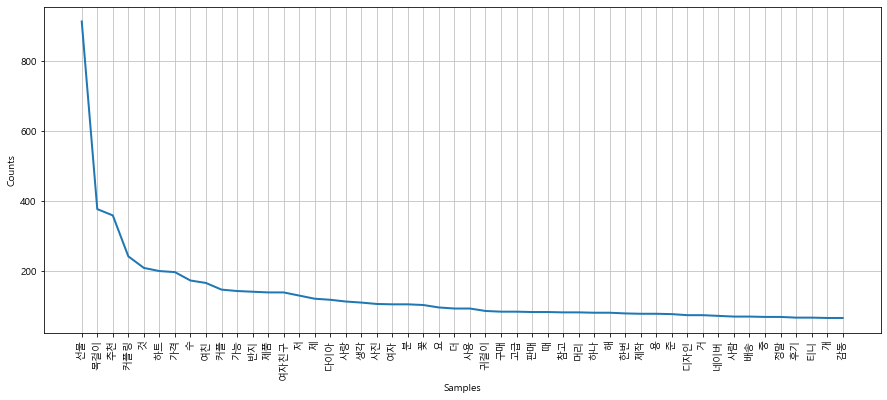

In [16]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [17]:
stoptext = """
    선물 추천 것 가격 수 기능 제품 저 제 생각 여자 여자친구 사용 요 더 꽃 구매 고급
    판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 거 네이버 사람 배송 중 후기 감동
    하트 여친 커플 가능 사랑 인기 상품 직접 브랜드 선택 곳 모양 마감 요즘 노늘 가지 남녀
    그냥 위 페이 마음 부담 오늘 남자 협찬 전 핸드 의미 도움 색상 아래 포장 처 조금 하루 정도
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '신지', '몇개', '투척', '클래식', '커플룩', '버핏']

## 워드 클라우드 그리기

In [18]:
from wordcloud import WordCloud
from PIL import Image

In [19]:
data = gift.vocab().most_common(300)
path = 'data/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white'
).generate_from_frequencies(dict(data))

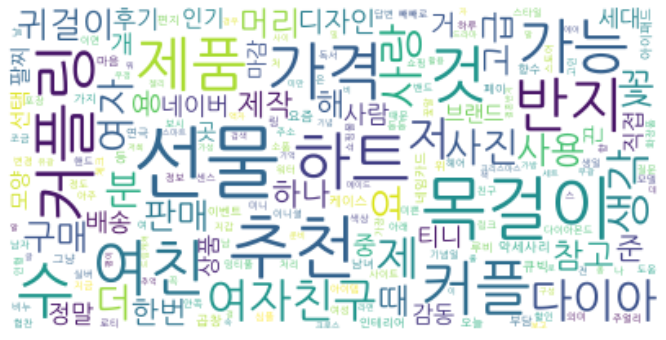

In [25]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림에 표시

In [21]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [22]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

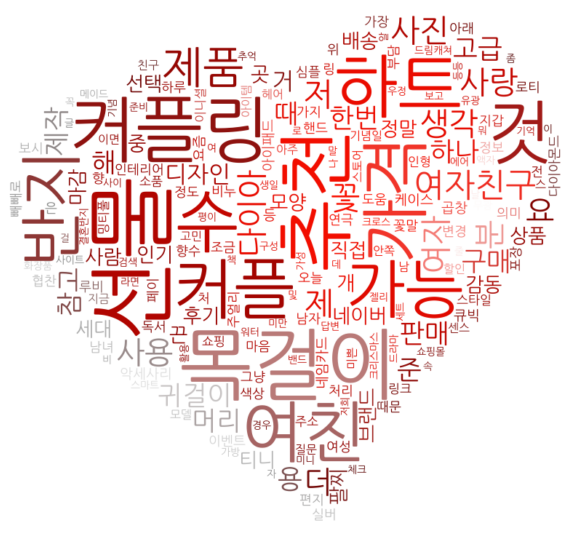

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()